In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [3]:
targetdir = "./data/TraderStrength/total_window_cdf/"
filename = "strengthCDF_total_window.csv"

df = pd.read_csv(targetdir + filename)

In [4]:
df

,timestamp,strength,activity,strength_cumulative_probability,total_transactions,activity_cumulative_probability,total_activity_days
0,1619560797000,23214,1112,0.000019,12127862,0.000002,2466811
1,1619560797000,45501,1090,0.000008,12127862,0.000004,2466811
2,1619560797000,49308,1049,0.000006,12127862,0.000006,2466811
3,1619560797000,8400,1031,0.000109,12127862,0.000008,2466811
4,1619560797000,7605,955,0.000145,12127862,0.000009,2466811
...,...,...,...,...,...,...,...
532723,1619560797000,1,1,1.000000,12127862,1.000000,2466811
532724,1619560797000,1,1,1.000000,12127862,1.000000,2466811
532725,1619560797000,1,1,1.000000,12127862,1.000000,2466811
532726,1619560797000,1,1,1.000000,12127862,1.000000,2466811


In [5]:
df.drop(["total_transactions", "total_activity_days"], axis=1, inplace=True)

In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms').dt.normalize()

In [160]:
df

,timestamp,strength,activity,strength_cumulative_probability,activity_cumulative_probability
0,2021-04-27,23214,1112,0.000019,0.000002
1,2021-04-27,45501,1090,0.000008,0.000004
2,2021-04-27,49308,1049,0.000006,0.000006
3,2021-04-27,8400,1031,0.000109,0.000008
4,2021-04-27,7605,955,0.000145,0.000009
...,...,...,...,...,...
532723,2021-04-27,1,1,1.000000,1.000000
532724,2021-04-27,1,1,1.000000,1.000000
532725,2021-04-27,1,1,1.000000,1.000000
532726,2021-04-27,1,1,1.000000,1.000000


# Strength CDF

In [7]:
strength_df = df[["strength", "strength_cumulative_probability"]].sort_values(["strength"], ascending=False)
strength_df

,strength,strength_cumulative_probability
402,322493,0.000002
308,148904,0.000004
2,49308,0.000006
1,45501,0.000008
214,43770,0.000009
...,...,...
439993,1,1.000000
439992,1,1.000000
439991,1,1.000000
439990,1,1.000000


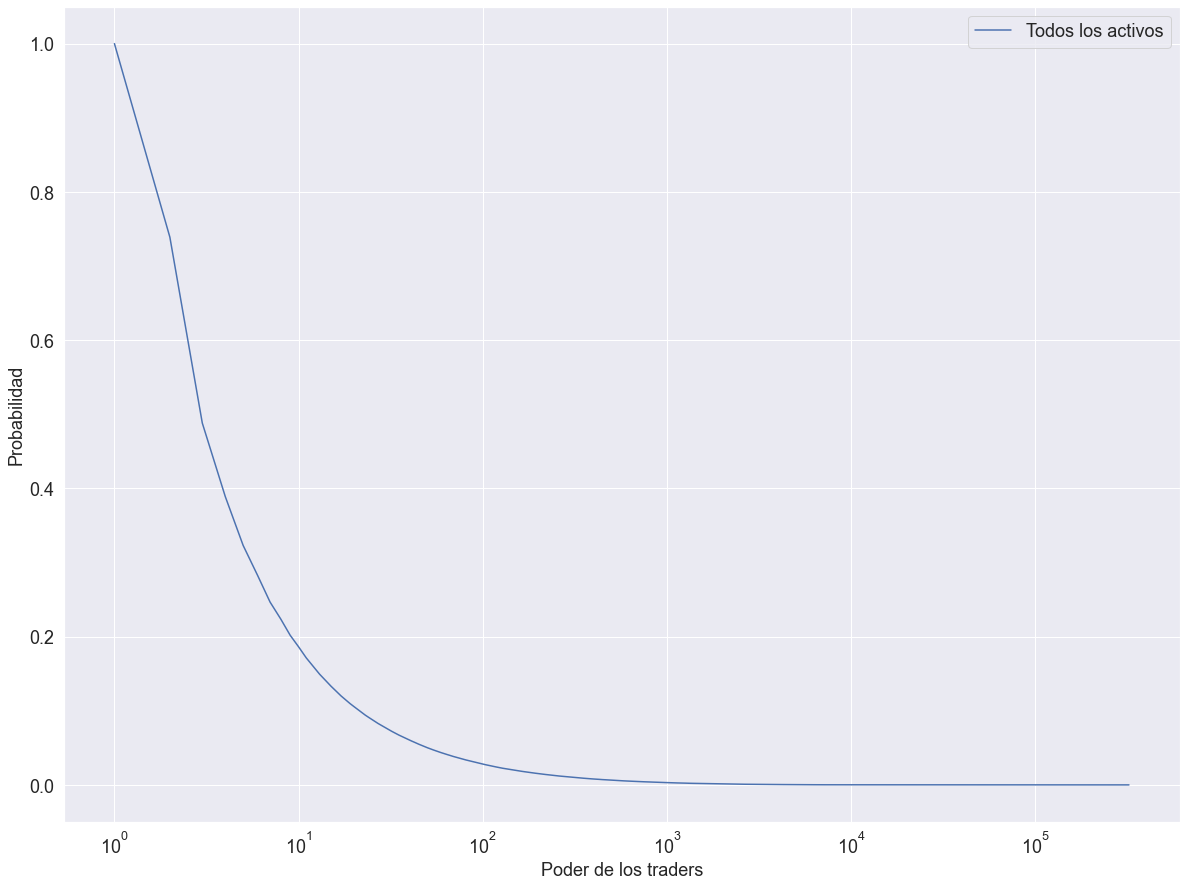

In [9]:
ax = strength_df.plot(kind = 'line', x = 'strength', y = 'strength_cumulative_probability')

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("Poder de los traders", fontsize=18)
ax.set_ylabel("Probabilidad", fontsize=18)
plt.legend(["Todos los activos"], prop={'size': 18})
plt.rcParams["figure.figsize"] = (20, 15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./strengthCDF/total_window/Figura_31.svg", bbox_inches='tight')

In [81]:
strength_df[strength_df["strength_cumulative_probability"] > 0.49]

,strength,strength_cumulative_probability
327291,2,0.738906
327304,2,0.738906
327292,2,0.738906
327293,2,0.738906
327294,2,0.738906
...,...,...
439993,1,1.000000
439992,1,1.000000
439991,1,1.000000
439990,1,1.000000


In [82]:
strength_df[strength_df["strength"] > 9000]

,strength,strength_cumulative_probability
402,322493,0.000002
308,148904,0.000004
2,49308,0.000006
1,45501,0.000008
214,43770,0.000009
1103,28570,0.000011
1701,28379,0.000013
582,25335,0.000015
23,23841,0.000017
0,23214,0.000019


In [83]:
1-0.488108

0.511892

# Activity CDF

In [10]:
activity_df = df[["activity", "activity_cumulative_probability"]].sort_values(["activity"], ascending=False)
activity_df

,activity,activity_cumulative_probability
0,1112,0.000002
1,1090,0.000004
2,1049,0.000006
3,1031,0.000008
4,955,0.000009
...,...,...
351791,1,1.000000
351792,1,1.000000
351793,1,1.000000
351794,1,1.000000


In [11]:
activity_df[activity_df["activity_cumulative_probability"] > 0.95]

,activity,activity_cumulative_probability
442254,1,1.0
442261,1,1.0
442255,1,1.0
442256,1,1.0
442257,1,1.0
...,...,...
351791,1,1.0
351792,1,1.0
351793,1,1.0
351794,1,1.0


In [12]:
activity_df[activity_df["activity"] > 900]

,activity,activity_cumulative_probability
0,1112,0.000002
1,1090,0.000004
2,1049,0.000006
3,1031,0.000008
4,955,0.000009
5,922,0.000011


In [13]:
1-0.490524

0.509476

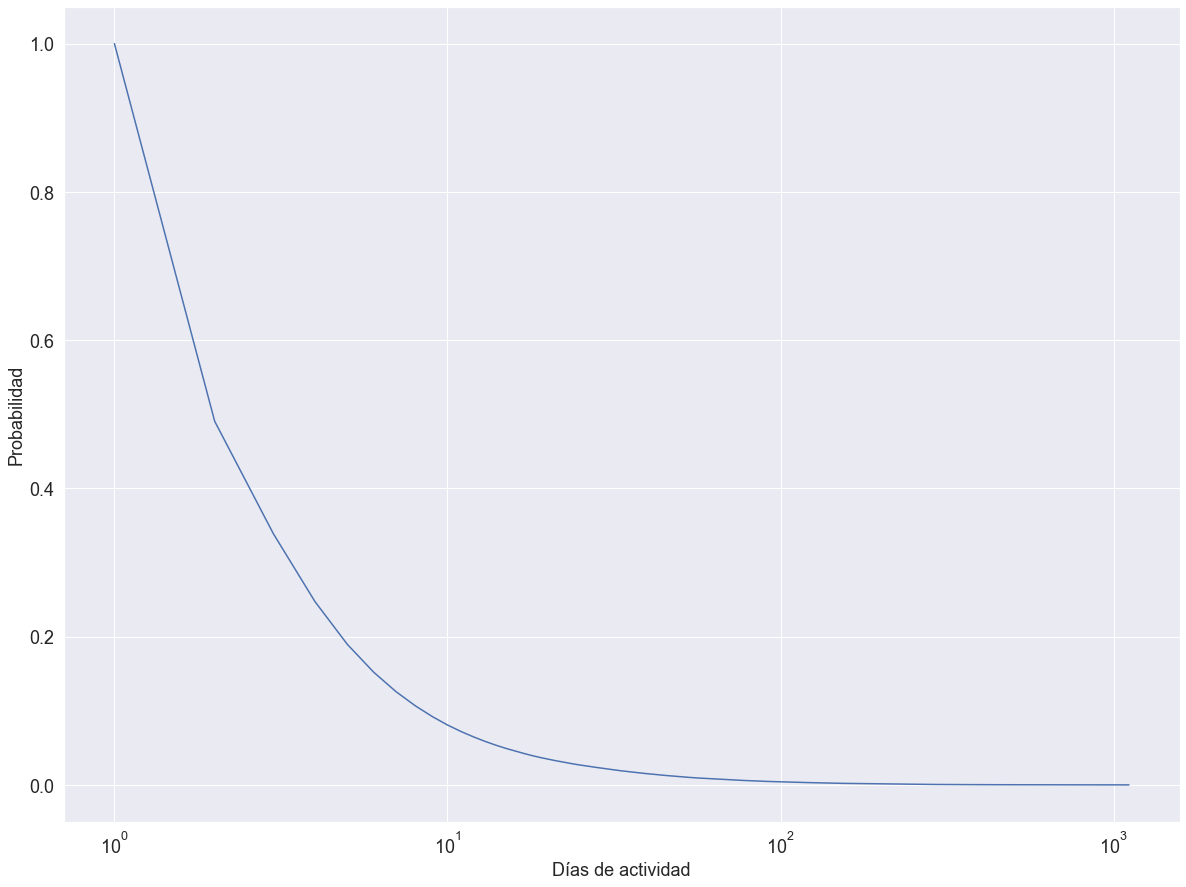

In [15]:
ax = activity_df.plot(kind = 'line', x = 'activity', y = 'activity_cumulative_probability')

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("Días de actividad", fontsize=18)
ax.set_ylabel("Probabilidad", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20, 15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./strengthCDF/total_window/Figura_33.svg", bbox_inches='tight')

# Strength vs Days of activity

In [183]:
st_act_df = df[["activity", "strength"]]
st_act_df = st_act_df.groupby(["activity"]).median().reset_index().sort_values(["activity"], ascending=False)
st_act_df

,activity,strength
505,1112,23214.0
504,1090,45501.0
503,1049,49308.0
502,1031,8400.0
501,955,7605.0
...,...,...
4,5,8.0
3,4,6.0
2,3,4.0
1,2,3.0


In [184]:
st_act_df = df[["timestamp", "activity", "strength"]].rolling(window="1D", on="timestamp").mean()
st_act_df

,timestamp,activity,strength
0,2021-04-27,1112.000000,23214.000000
1,2021-04-27,1101.000000,34357.500000
2,2021-04-27,1083.666667,39341.000000
3,2021-04-27,1070.500000,31605.750000
4,2021-04-27,1047.400000,26805.600000
...,...,...,...
532723,2021-04-27,4.630554,22.765744
532724,2021-04-27,4.630547,22.765703
532725,2021-04-27,4.630540,22.765662
532726,2021-04-27,4.630533,22.765621


In [185]:
len(st_act_df["activity"].unique())

532728

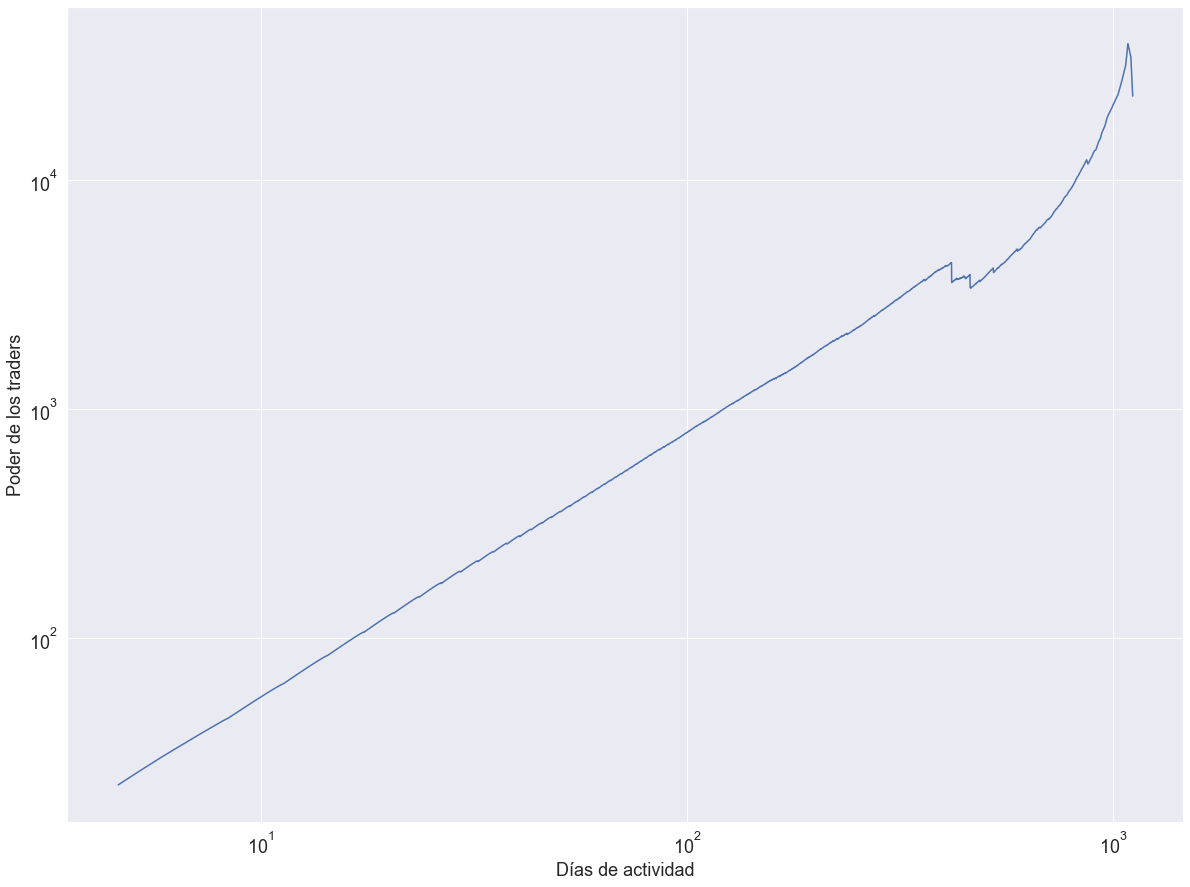

In [186]:
ax = st_act_df.plot(kind = 'line', x = 'activity', y = 'strength')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Días de actividad", fontsize=18)
ax.set_ylabel("Poder de los traders", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20, 15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./strengthCDF/total_window/activity_vs_strength.svg", bbox_inches='tight')

In [187]:
st_act_df[(st_act_df["activity"] > 400) & (st_act_df["activity"] < 800)]

,timestamp,activity,strength
37,2021-04-27,797.552632,9177.394737
38,2021-04-27,793.538462,9046.435897
39,2021-04-27,789.625000,8966.050000
40,2021-04-27,785.853659,8837.658537
41,2021-04-27,782.261905,8701.309524
...,...,...,...
446,2021-04-27,401.505593,4160.178971
447,2021-04-27,401.158482,4154.770089
448,2021-04-27,400.812918,4148.485523
449,2021-04-27,400.468889,4141.273333


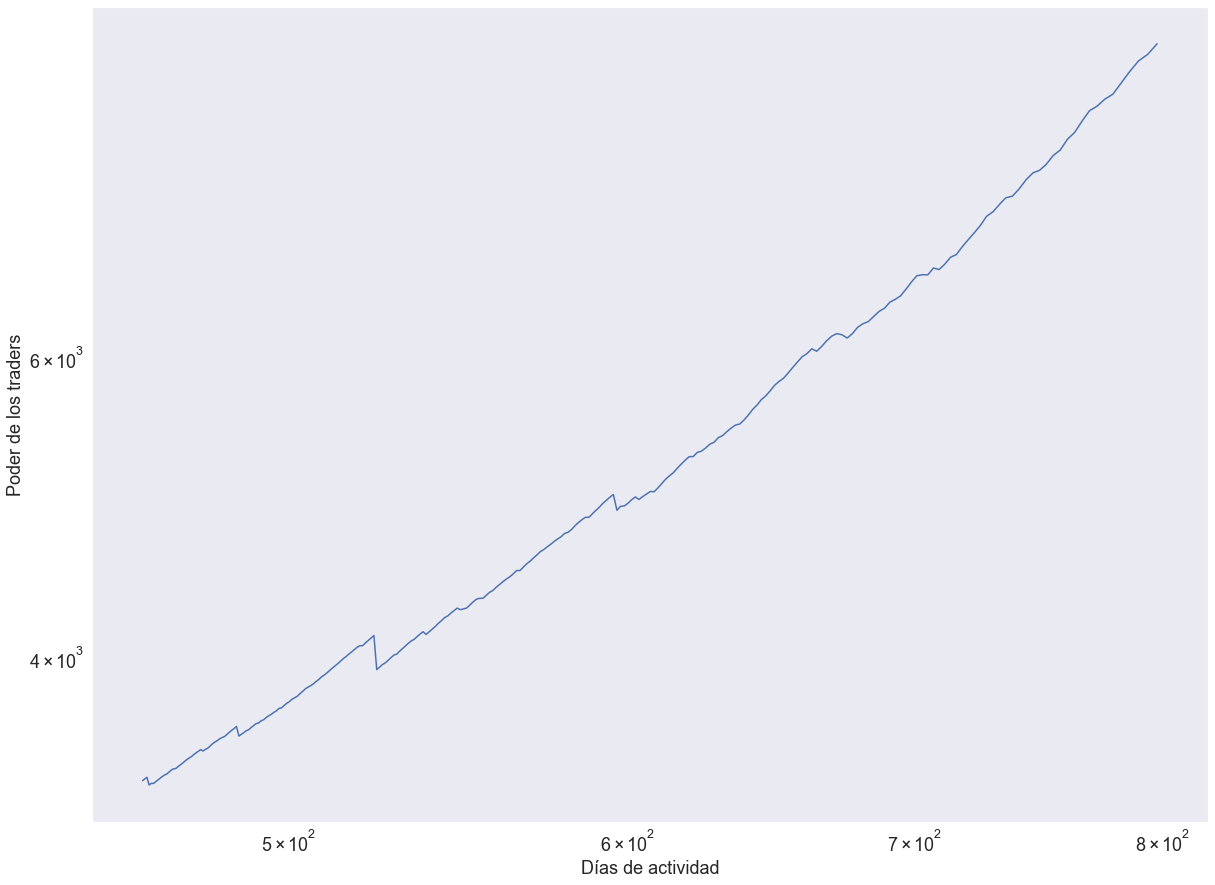

In [208]:
ax = st_act_df[(st_act_df["activity"] > 462) & (st_act_df["activity"] < 800)].plot(kind = 'line', x = 'activity', y = 'strength')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Días de actividad", fontsize=18)
ax.set_ylabel("Poder de los traders", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20, 15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 